In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

import plotly.graph_objs as go

In [129]:
# Define the parameters
theta = np.linspace(0, 2*np.pi, 30)
z = np.linspace(0, 1, 10)
theta, z = np.meshgrid(theta, z)

# Calculate the coordinates
x = np.cos(theta)
y = np.sin(theta)
tri = matplotlib.tri.Triangulation(np.ravel(z), np.ravel(theta))

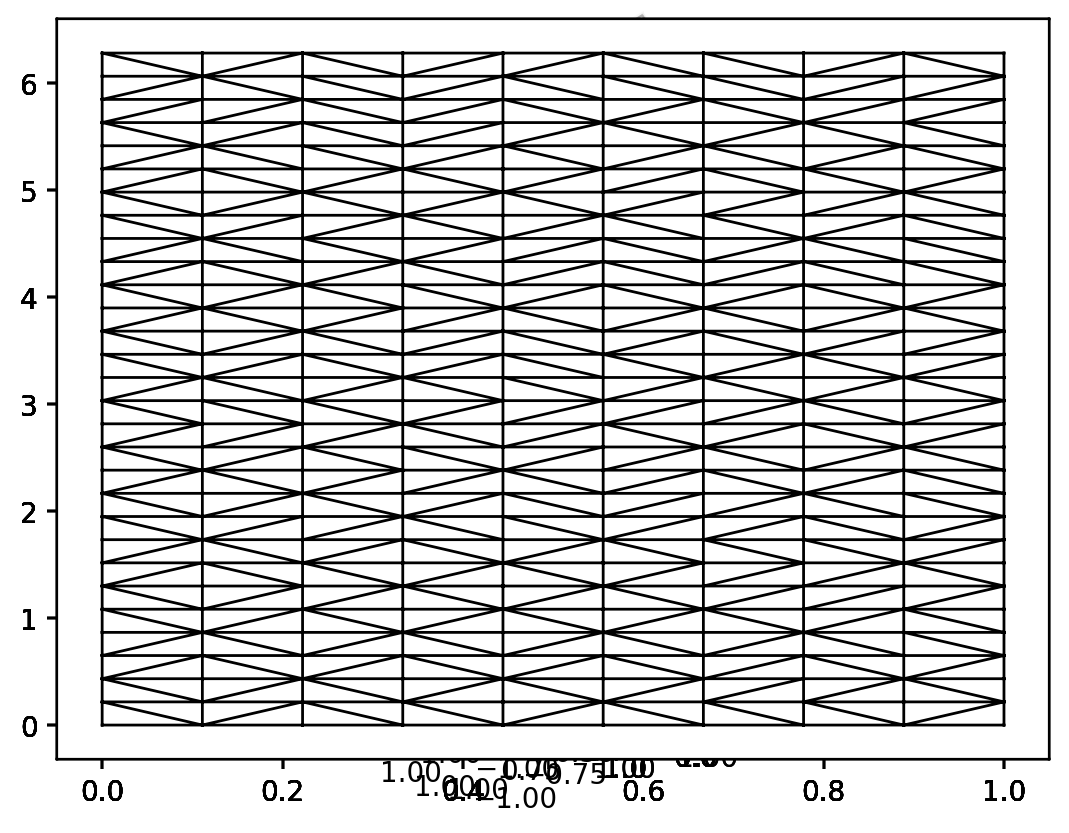

In [141]:
# sanity check: visualize this triangulation
ax = plt.axes()
ax.triplot(tri,color="k",lw=1)
plt.show()

In [131]:
# Reshape the coordinates for plotting
x = x.flatten()
y = y.flatten()
z = z.flatten()

In [133]:
%matplotlib widget

In [136]:
%matplotlib inline

In [138]:
# Plotting the mesh lines sometimes helps to make things clearer, not built in with plotly.
# Use this workaround: https://community.plotly.com/t/show-edges-of-the-mesh-in-a-mesh3d-plot/33614/3

def plotMeshPlotly(points,triangles):
    tri_points=points[triangles]
    Xe = []
    Ye = []
    Ze = []
    for T in tri_points:
        Xe.extend([T[k%3][0] for k in range(4)]+[ None])
        Ye.extend([T[k%3][1] for k in range(4)]+[ None])
        Ze.extend([T[k%3][2] for k in range(4)]+[ None])
       
    #define the trace for triangle sides
    lines = go.Scatter3d(
                       x=Xe,
                       y=Ye,
                       z=Ze,
                       mode='lines',
                       name='',
                       line=dict(color= 'rgb(70,70,70)', width=2)) 

    mesh=go.Mesh3d(x=points[:,0],y=points[:,1],z=points[:,2],i=triangles[:,0],j=triangles[:,1],k=triangles[:,2])
    
    fig = go.Figure(data=[mesh,lines],layout={"height":500,"scene":{"aspectratio":{"x":1,"y":1,"z":.4}}})
    fig.show()

In [140]:
points=np.stack([x,y,z],axis=1)
plotMeshPlotly(points,tri.triangles)